# Feature Engineering

In [8]:
%matplotlib inline
import numpy as np
import pywt
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [14]:
image = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\misc_data\mo1.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

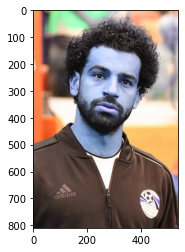

In [15]:
plt.imshow(image)

In [16]:
coeffs = pywt.dwt2(gray_image, "db3", mode="periodization")
cA, (cH, cV, cD) = coeffs

In [17]:
imageR = pywt.idwt2(coeffs, "db3", mode="periodization")
imageR = np.uint8(imageR)

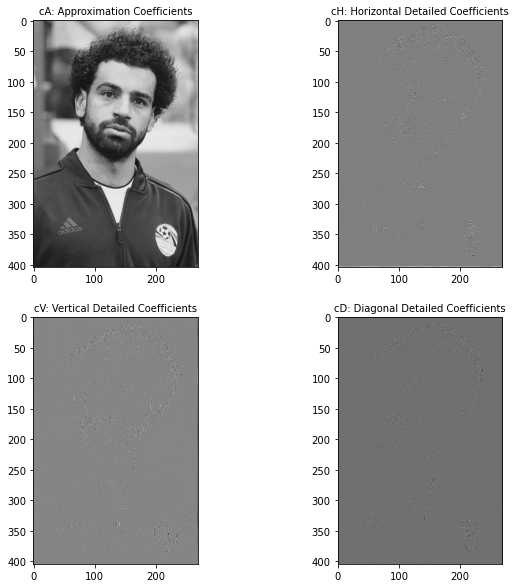

Text(0.5, 1.0, 'Reconstructed Image')

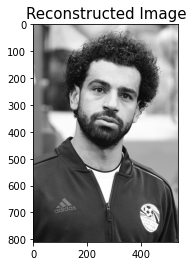

In [21]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cA, cmap=plt.cm.gray)
plt.title("cA: Approximation Coefficients", fontsize=10)

plt.subplot(2, 2, 2)
plt.imshow(cH, cmap=plt.cm.gray)
plt.title("cH: Horizontal Detailed Coefficients", fontsize=10)

plt.subplot(2, 2, 3)
plt.imshow(cV, cmap=plt.cm.gray)
plt.title("cV: Vertical Detailed Coefficients", fontsize=10)

plt.subplot(2, 2, 4)
plt.imshow(cD, cmap=plt.cm.gray)
plt.title("cD: Diagonal Detailed Coefficients", fontsize=10)

plt.show()

plt.imshow(imageR, cmap="gray")
plt.title("Reconstructed Image", fontsize=15)